Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.2646 - loss: 2.1352 - val_accuracy: 0.6027 - val_loss: 1.6391
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.6481 - loss: 1.5384 - val_accuracy: 0.7572 - val_loss: 1.2350
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.7574 - loss: 1.1912 - val_accuracy: 0.8038 - val_loss: 0.9967
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.7949 - loss: 0.9852 - val_accuracy: 0.8233 - val_loss: 0.8516
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8182 - loss: 0.8496 - val_accuracy: 0.8378 - val_loss: 0.7560
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.8314 - loss: 0.7647 - val_accuracy: 0.8491 - val_loss: 0.6888
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8409 - loss: 0.7056 - val_accuracy: 0.8558 - val_loss: 0.6393
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8498 -

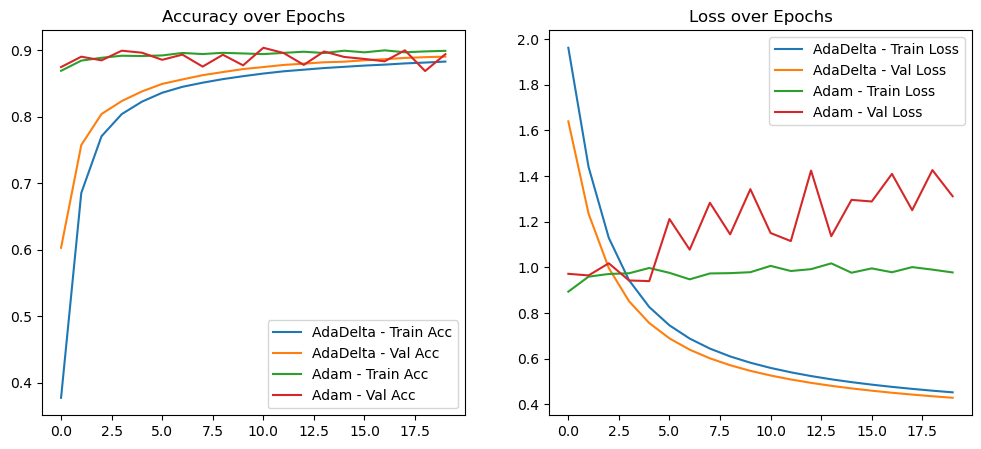

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def create_model(optimizer):
    model = keras.Sequential([
        keras.layers.Dense(10, activation='softmax', input_shape=(784,))
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

optimizer_adadelta = keras.optimizers.Adadelta(learning_rate=0.01)
model_adadelta = create_model(optimizer_adadelta)
history_adadelta = model_adadelta.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

optimizer_adam = keras.optimizers.Adam(learning_rate=0.05)
model_adam = create_model(optimizer_adam)
history_adam = model_adam.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_adadelta.history['accuracy'], label='AdaDelta - Train Acc')
plt.plot(history_adadelta.history['val_accuracy'], label='AdaDelta - Val Acc')
plt.plot(history_adam.history['accuracy'], label='Adam - Train Acc')
plt.plot(history_adam.history['val_accuracy'], label='Adam - Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_adadelta.history['loss'], label='AdaDelta - Train Loss')
plt.plot(history_adadelta.history['val_loss'], label='AdaDelta - Val Loss')
plt.plot(history_adam.history['loss'], label='Adam - Train Loss')
plt.plot(history_adam.history['val_loss'], label='Adam - Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()
